# Problem Statement
BoomBikes, a US bike-sharing provider, has faced significant revenue declines due to the COVID-19 pandemic. To recover, they aim to understand the post-quarantine demand for shared bikes. This insight will help them create a strategic business plan to meet customer needs, outperform competitors, and achieve substantial profits once the lockdown ends and the economy recovers.

# Factor to Analyze

The company wants to understand the factors affecting the demand for these shared bikes in the American market. 
The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

# Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Dataset characteristics

Given "day.csv" have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	

## Import Libaries

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Display all columns of the dataframe
pd.set_option('display.max_columns', None)

In [4]:
# loading sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score,mean_squared_error




## Data Reading

In [5]:
# loading the dataset
df = pd.read_csv('day.csv')

In [6]:
# checking the shape of the dataset
df .shape

(730, 16)

In [7]:
# checking the first 5 rows of the dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
# checking the statistical summary of the dataset
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Frame Copying

In [10]:
# Copying the dataset to another dataframe
biking_df = df.copy()

In [11]:
# checking the shape of the dataset
biking_df.shape

(730, 16)

## Data Cleaning

In [12]:
# Removing duplicate rows from the dataset
biking_df.drop_duplicates(inplace=True)
biking_df.shape


(730, 16)

 - No duplicate rows in the dataframe.

In [13]:
# Checking for null values in the dataset columns
biking_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- No null values are present in the dataset

In [14]:
biking_df.columns.values

array(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'], dtype=object)

In [15]:
# Rename the columns for better understanding
biking_df.rename(columns={'weathersit':'weather_situation',
                         'hum':'humidity',
                         'mnth':'month',
                         'cnt':'count',
                         'yr':'year',
                         }, inplace=True)

In [16]:
# Checking the columns of the dataset after renaming
biking_df.columns.values

array(['instant', 'dteday', 'season', 'year', 'month', 'holiday',
       'weekday', 'workingday', 'weather_situation', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype=object)

In [17]:
# Checking the first 5 rows of the dataset after renaming
biking_df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Dropping unwanted columns

In [18]:
# Dropping the columns which are not required for the analysis

# Dropping the column 'instant' - As it is just a record index
# Dropping the column 'dteday' -  As we have 'year' and 'month' columns
# Dropping the columns 'registered','casual' - As we have 'count' column covering both

biking_df.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)

In [19]:
biking_df.head(1)

,season,year,month,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985


#### Labelling categorical column values for readability in data visualization

In [20]:
# Label the columns 'season', 'weather_situation', 'month', 'weekday' with appropriate values

biking_df['season'] = biking_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
biking_df['weather_situation'] = biking_df['weather_situation'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'})
biking_df['month'] = biking_df['month'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
#biking_df['weekday'] = biking_df['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
biking_df['weekday'] = biking_df['weekday'].map({0: 'Tue', 1: 'Wed', 2: 'Thu', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon'})



In [21]:
# Checking the information of the dataset after labeling the columns
biking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             730 non-null    object 
 1   year               730 non-null    int64  
 2   month              730 non-null    object 
 3   holiday            730 non-null    int64  
 4   weekday            730 non-null    object 
 5   workingday         730 non-null    int64  
 6   weather_situation  730 non-null    object 
 7   temp               730 non-null    float64
 8   atemp              730 non-null    float64
 9   humidity           730 non-null    float64
 10  windspeed          730 non-null    float64
 11  count              730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [22]:
# Checking the first 5 rows of the dataset after labeling the columns
biking_df.head()

,season,year,month,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,count
0,Spring,0,Jan,0,Mon,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Data Visualization

In [23]:
# Separting the numerical and categorical variables
num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'count']
catg_vars = ['season', 'year', 'month', 'holiday','weekday','workingday', 'weather_situation']

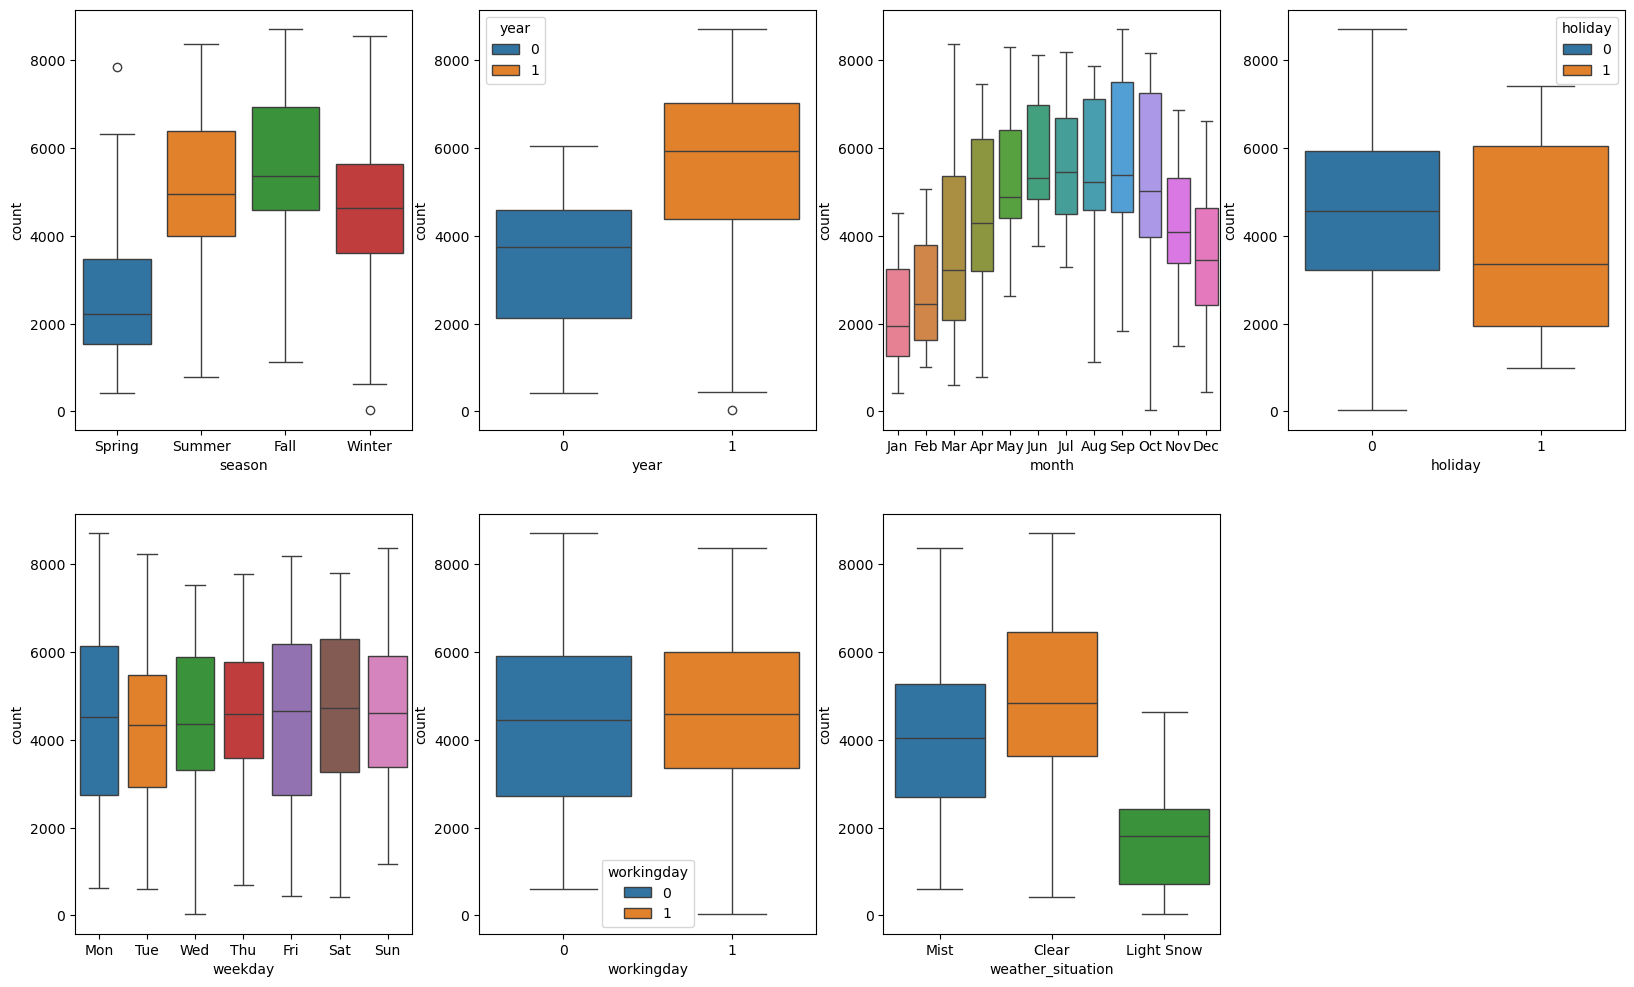

In [24]:
# Plotting the boxplot for the categorical variables against the count variable
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'count', data = biking_df,hue='season')
plt.subplot(2,4,2)
sns.boxplot(x = 'year', y = 'count', data = biking_df,hue='year')
plt.subplot(2,4,3)
sns.boxplot(x = 'month', y = 'count', data = biking_df,hue='month')
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'count', data = biking_df,hue='holiday')
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'count', data = biking_df,hue='weekday')
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'count', data = biking_df,hue='workingday')
plt.subplot(2,4,7)
sns.boxplot(x = 'weather_situation', y = 'count', data = biking_df,hue='weather_situation')
plt.show()

### Observations
- Season Vs Count : Count is High in 'Fall' and Low in 'Spring'.
- Year Vs Count :  Count is High in 2019 and Low in 2018. Inference - Count is increased from 2018 to 2019
- Month Vs Count : Count is 'Sep' and low in 'Jan'.  Inference - Count is steadily increased from July to Sep having Sep is the highest and then declined steadily till Jan.
- Holiday Vs Count: Median Count is high in 'Working days' and low in 'Holidays'
- Weekday Vs Count :  Counts are relatively consistent across 'weekdays' and Saturday but lower on Sunday.
- Working Days Vs Count :  Counts are slightly higher on 'working days'  compared to 'non-working days'.
- Weather Vs Count : Counts are high in 'clear' weather and lower in 'light-snow' conditions

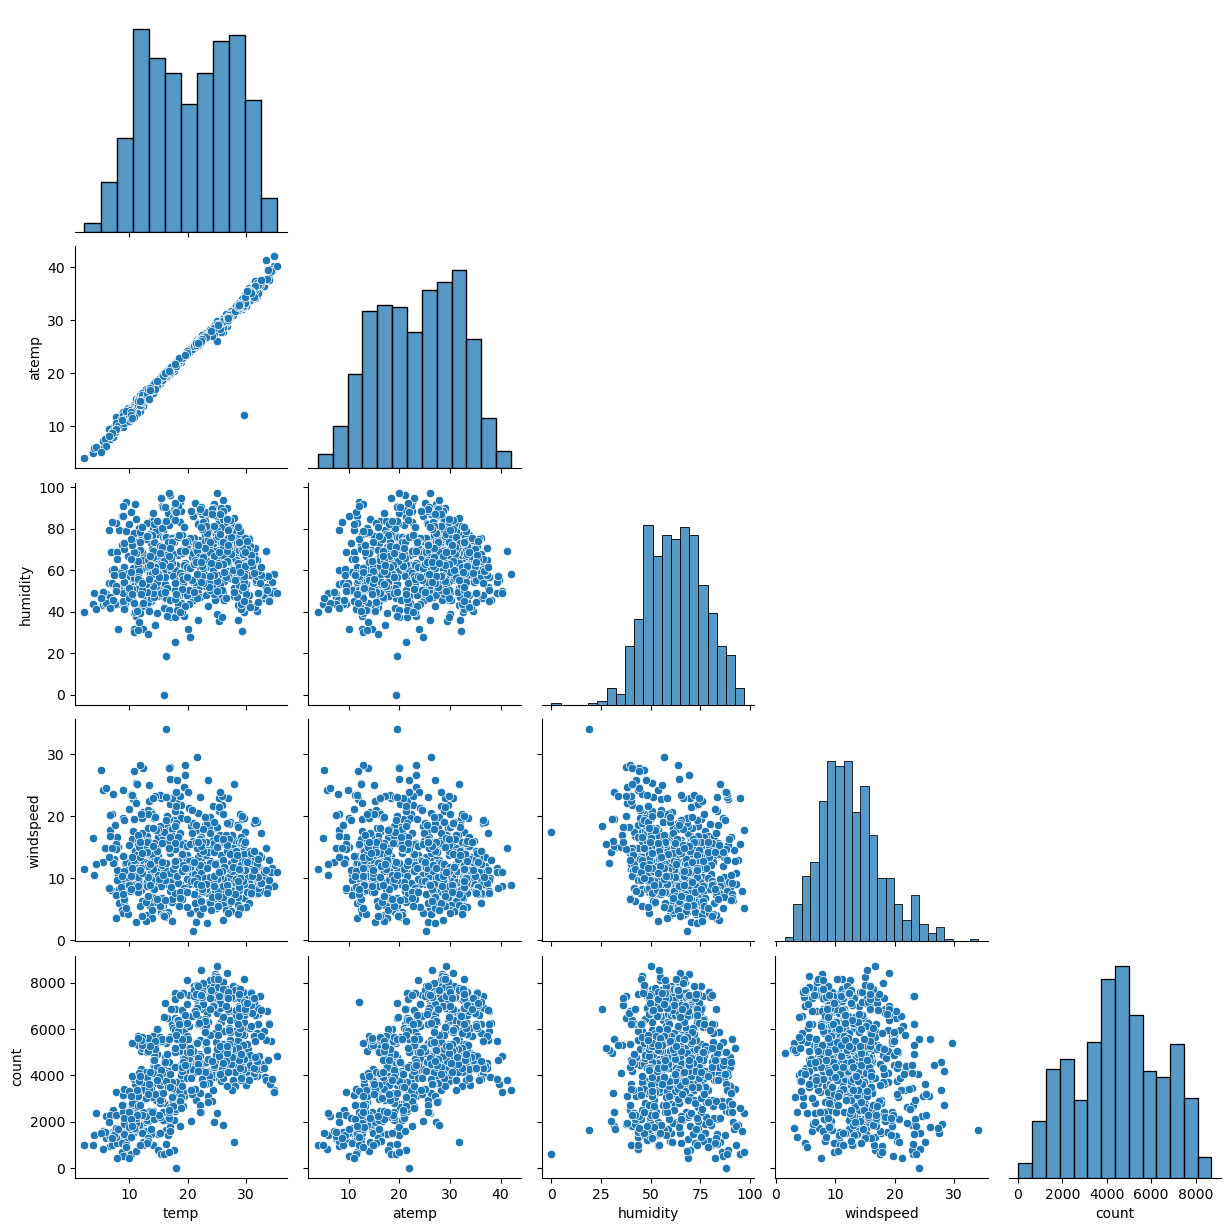

In [25]:
# Plotting Pairplot for the numerical variables
sns.pairplot(biking_df[num_vars],corner=True)
plt.show()



### Observation
- temp and atemp variables have show linear regression relationship with count.
- temp and atemp variables shown highest correlation

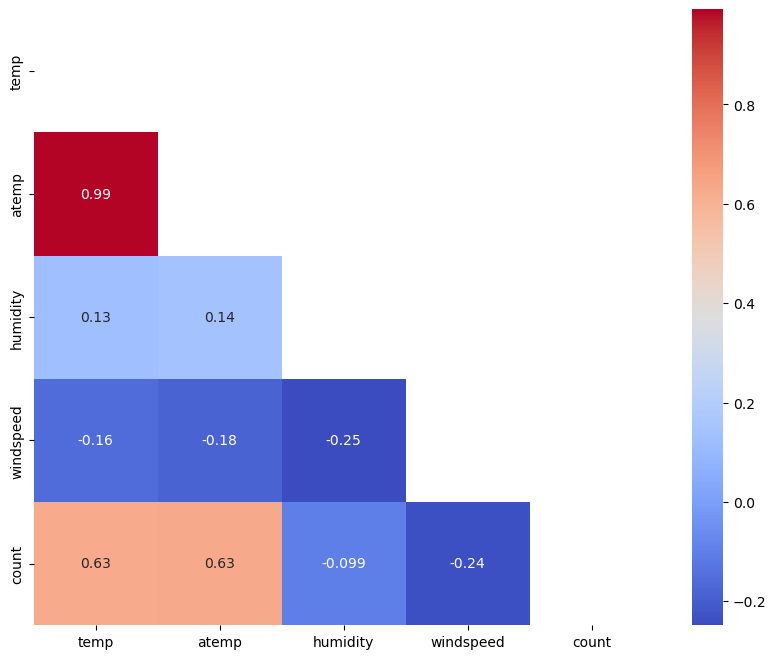

In [26]:
# Create a heatmap for the correlation between the numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(biking_df[num_vars].corr(), mask=np.triu(biking_df[num_vars].corr()), annot=True, cmap='coolwarm')
plt.show()

### Observation
- Highest positive correlation is found between temp and atemp. So it is indicating multicolinearity.
- Good correlation is found between temp/atemp and count
- Highest Negative correlation is found between windspeed and count



## Creating Dummy variables 

In [27]:
biking_df.head(1)

,season,year,month,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,count
0,Spring,0,Jan,0,Mon,0,Mist,14.110847,18.18125,80.5833,10.749882,985


In [28]:
# Create dummy variables for the categorical variables
#biking_df_01 = pd.get_dummies(biking_df, drop_first=True,dtype=int)
months_df=pd.get_dummies(biking_df.month,drop_first=True,dtype=int)
weekdays_df=pd.get_dummies(biking_df.weekday,drop_first=True,dtype=int)
weathersit_df=pd.get_dummies(biking_df.weather_situation,drop_first=True,dtype=int)
seasons_df=pd.get_dummies(biking_df.season,drop_first=True,dtype=int)

In [29]:
# Merging  the dataframe, with the dummy variable dataset. 

biking_df_01 = pd.concat([biking_df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [30]:
biking_df_01.columns.values

array(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather_situation', 'temp', 'atemp', 'humidity', 'windspeed',
       'count', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed',
       'Light Snow', 'Mist', 'Spring', 'Summer', 'Winter'], dtype=object)

In [31]:
# Dropping the original categorical variables from the dataframe
biking_df_01.drop(['season','month','weekday','weather_situation'],axis=1,inplace=True)

In [32]:
# Display all columns of the dataframe

biking_df_01.head(1)

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist,Spring,Summer,Winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0


In [33]:
biking_df_01.shape

(730, 30)

In [34]:
biking_df_01.columns.values # Checking the columns of the dataframe

array(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'count', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'Light Snow', 'Mist', 'Spring', 'Summer', 'Winter'],
      dtype=object)

In [35]:
# Checking the shape of the dataset after creating dummy variables
biking_df_01.shape

(730, 30)

In [36]:
# Checking the information of the dataset after creating dummy variables
biking_df_01.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   humidity    730 non-null    float64
 6   windspeed   730 non-null    float64
 7   count       730 non-null    int64  
 8   Aug         730 non-null    int32  
 9   Dec         730 non-null    int32  
 10  Feb         730 non-null    int32  
 11  Jan         730 non-null    int32  
 12  Jul         730 non-null    int32  
 13  Jun         730 non-null    int32  
 14  Mar         730 non-null    int32  
 15  May         730 non-null    int32  
 16  Nov         730 non-null    int32  
 17  Oct         730 non-null    int32  
 18  Sep         730 non-null    int32  
 19  Mon         730 non-null    i

## Splitting the dataset into training and testing sets

In [37]:
# Shape of the dataset before splitting
biking_df_01.shape

(730, 30)

In [38]:
# Splitting the dataset into training and testing sets

df_train, df_test = train_test_split(biking_df_01, train_size = 0.7, random_state = 100)


In [39]:
print(f'Size of the training set: {df_train.shape} \nSize of the testing set: {df_test.shape}')

Size of the training set: (510, 30) 
Size of the testing set: (220, 30)


## Rescaling the numeric variables in traning data set

In [40]:
# Creating MinMaxScaler object
scaler = MinMaxScaler()


In [41]:
num_vars

['temp', 'atemp', 'humidity', 'windspeed', 'count']

In [42]:
df_train.columns.values

array(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'count', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'Light Snow', 'Mist', 'Spring', 'Summer', 'Winter'],
      dtype=object)

In [43]:
# Numerical variables in the training set before scaling
df_train[num_vars].head()

,temp,atemp,humidity,windspeed,count
576,29.246653,33.1448,70.4167,11.083475,7216
426,16.980847,20.6746,62.1250,10.792293,4066
728,10.489153,11.5850,48.3333,23.500518,1796
482,15.443347,18.8752,48.9583,8.708325,4220
111,13.803347,16.0977,72.9583,14.707907,1683


In [44]:
# Apply scaling on numerical variables in the training set
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train[num_vars].describe()

,temp,atemp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
# Numerical variables in the training set After scaling
df_train[num_vars].head()

,temp,atemp,humidity,windspeed,count
576,0.815169,0.766351,0.725633,0.264686,0.827658
426,0.442393,0.438975,0.640189,0.255342,0.465255
728,0.245101,0.200348,0.498067,0.663106,0.204096
482,0.395666,0.391735,0.504508,0.188475,0.482973
111,0.345824,0.318819,0.751824,0.380981,0.191095


In [46]:
df_train.head(1)

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist,Spring,Summer,Winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Check the Correlation between the variables

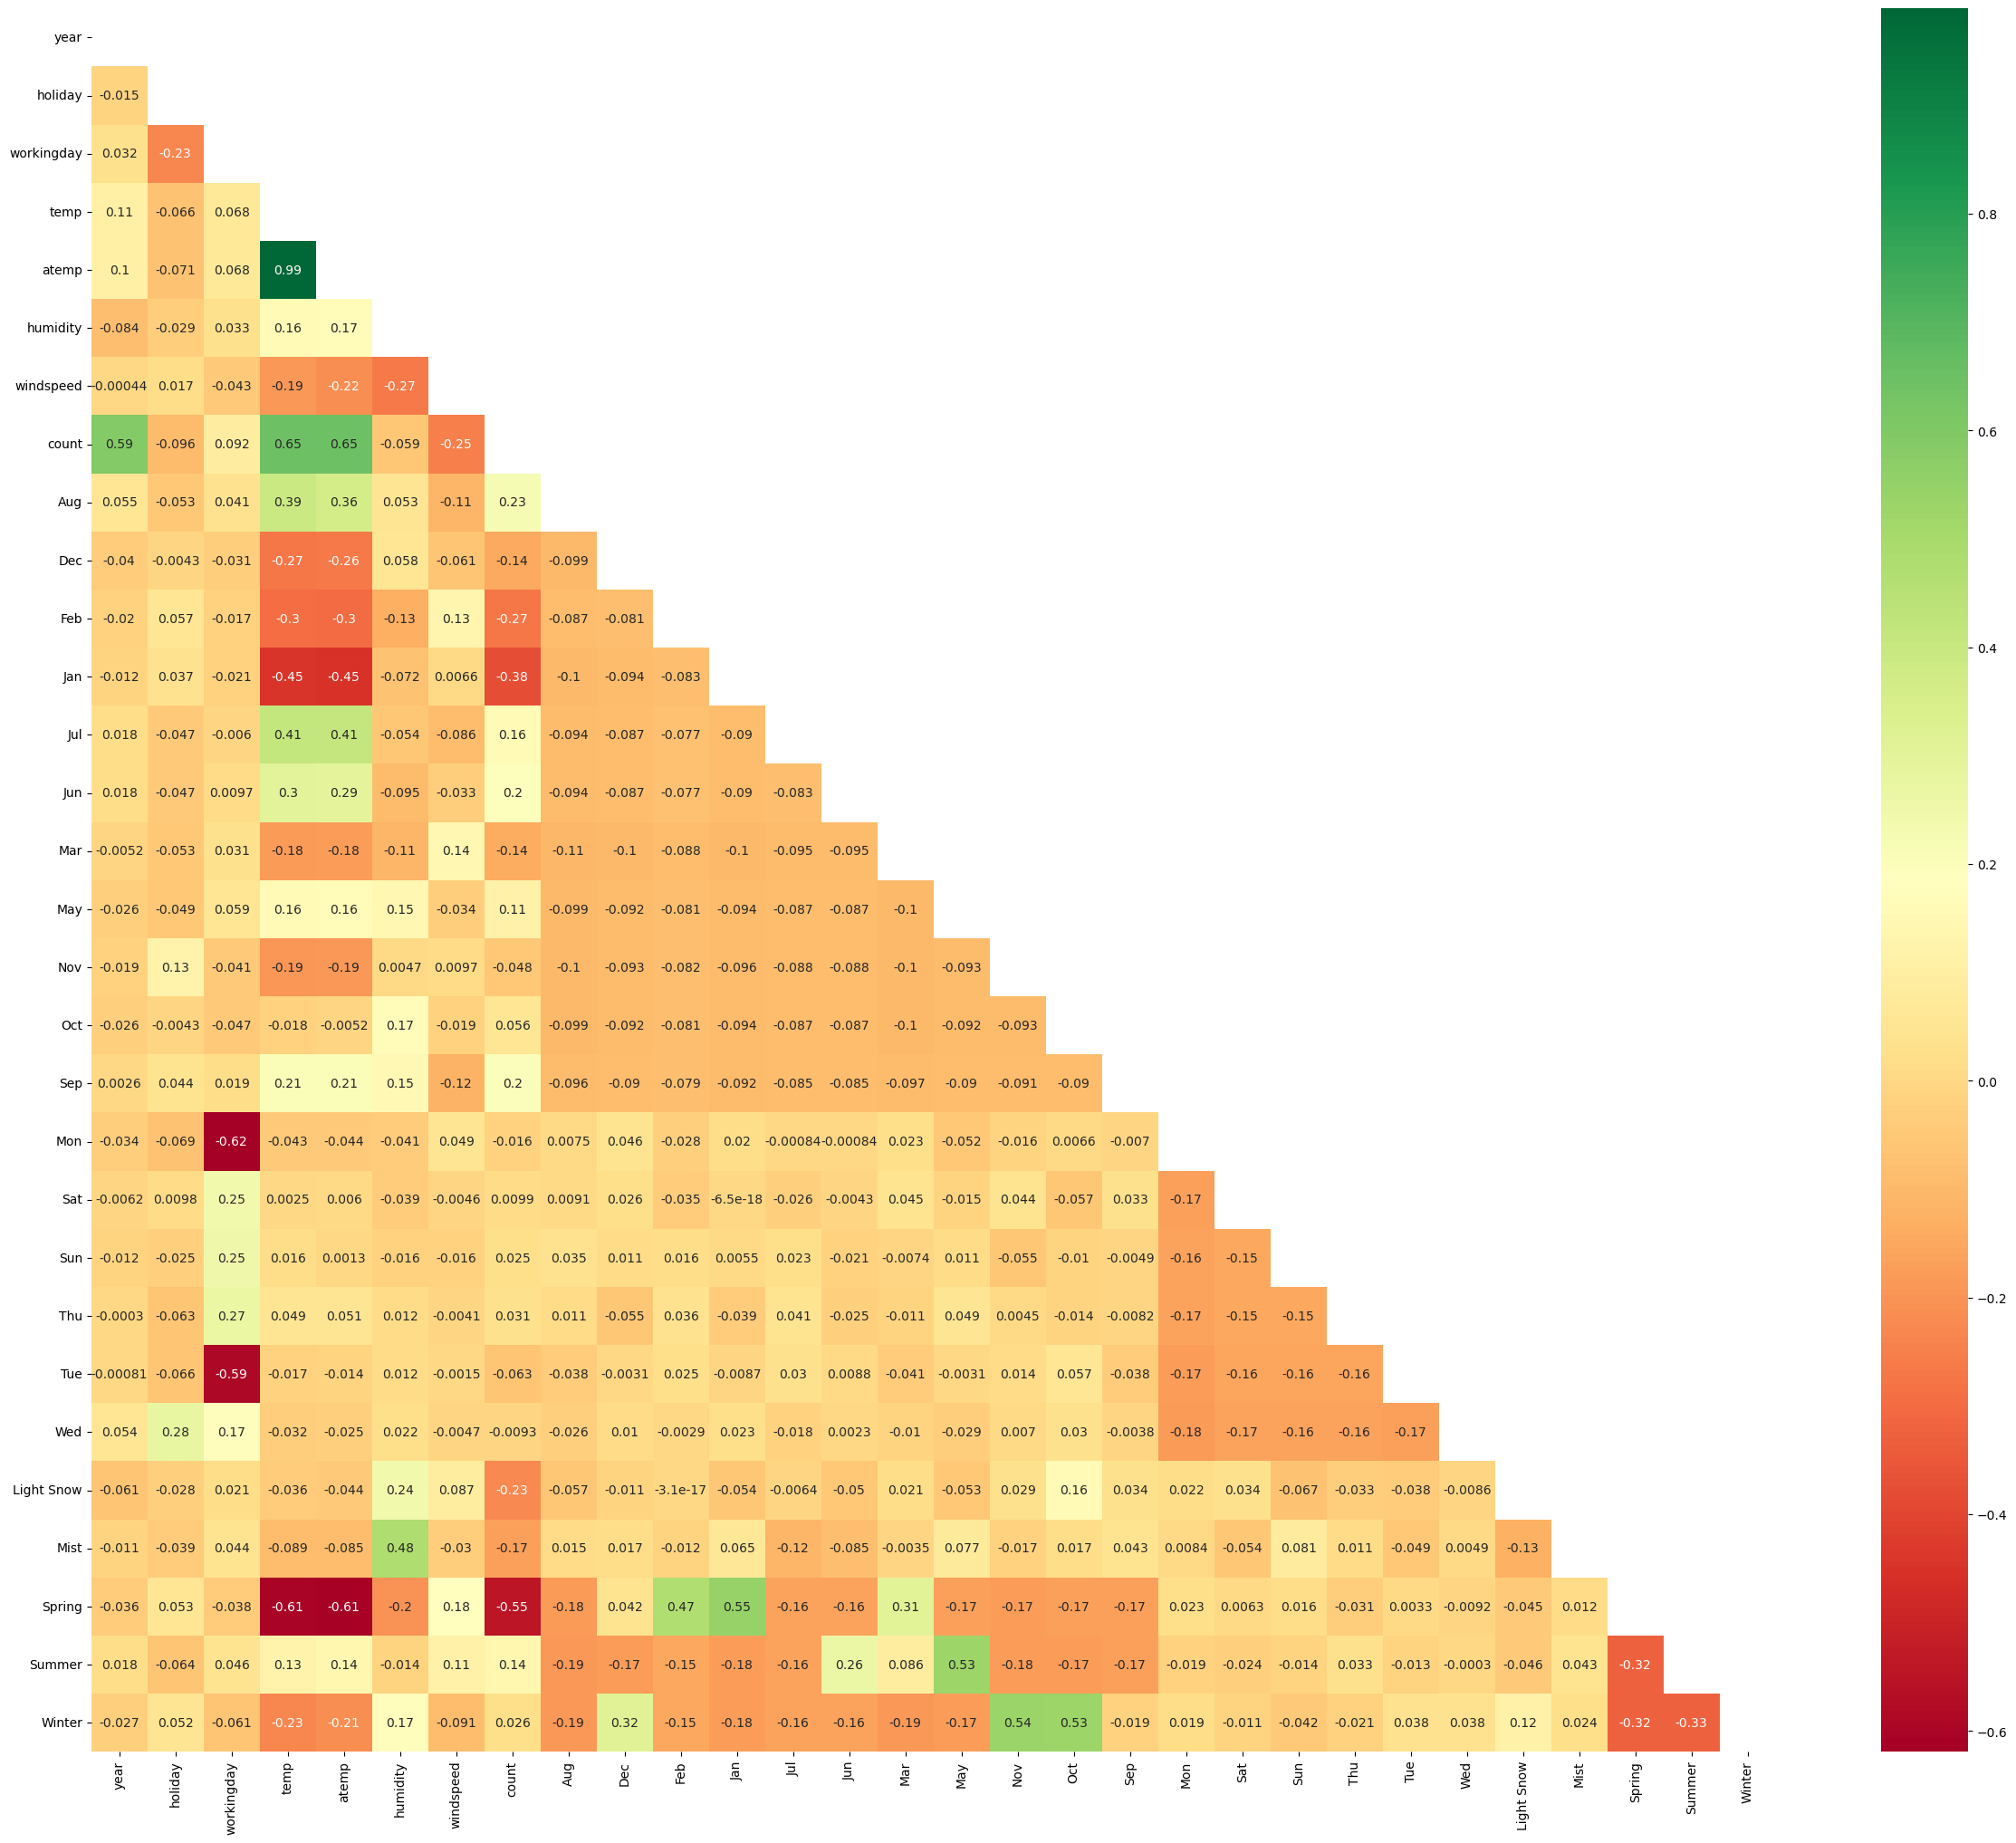

In [47]:
# Create a heat map for the correlation between the  variables after scaling
plt.figure(figsize=(30, 25))
sns.heatmap(df_train.corr(), mask=np.triu(df_train.corr()), annot=True, cmap='RdYlGn')
plt.show()


#### Observations 
Positive +ve Correlation is found on the following variables
 - Count Vs year
 - Count Vs temp 
 - Count Vs atemp 
 - Spring vs Jan 
 - Spring vs Feb 
 - Winter Vs Oct 
 - Winter Vs Nov 
 - Humidity Vs Weather Situation - Mist 
 - Summer Vs May 

 Negative -ve Correlation is found on the following variables 

 - Count Vs Seanson Spring 
 - Seanson Spring Vs temp
 - Seanson Spring Vs atemp
 - Count Vs WindSpeed

## Building Multi-linear Regression Model

In [48]:
# Separating the target variable and the independent variables in the training set
y_train = df_train.pop('count')
X_train = df_train


In [49]:
# Recursively Feature Elimination (RFE) for feature selection

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=12)
rfe = rfe.fit(X_train, y_train)


In [50]:
# Checking the features selected by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 10),
 ('Dec', False, 6),
 ('Feb', False, 7),
 ('Jan', False, 4),
 ('Jul', True, 1),
 ('Jun', False, 16),
 ('Mar', False, 18),
 ('May', False, 9),
 ('Nov', False, 5),
 ('Oct', False, 15),
 ('Sep', True, 1),
 ('Mon', False, 2),
 ('Sat', False, 17),
 ('Sun', False, 14),
 ('Thu', False, 13),
 ('Tue', False, 11),
 ('Wed', False, 12),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1)]

In [51]:
# Selected features by RFE
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'Jul', 'Sep',
       'Light Snow', 'Mist', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [52]:
# features rejected by RFE
rej_cols= X_train.columns[~rfe.support_]
rej_cols

Index(['workingday', 'atemp', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [53]:
# Create a function to calculate VIF

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [54]:
# Dataframe with selected features
X_train_rfe = X_train[rfe_cols]
X_train_rfe.head()

,year,holiday,temp,humidity,windspeed,Jul,Sep,Light Snow,Mist,Spring,Summer,Winter
576,1,0,0.815169,0.725633,0.264686,1,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,0,1,1,0,0
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,1,0,0
482,1,0,0.395666,0.504508,0.188475,0,0,0,1,0,1,0
111,0,0,0.345824,0.751824,0.380981,0,0,0,1,0,1,0


In [55]:
X_train_rfe.shape

(510, 12)

In [56]:
# Calculate VIF for the selected features on training set
calculateVIF(X_train_rfe)


,Features,VIF
3,humidity,28.03
2,temp,16.03
4,windspeed,4.65
9,Spring,4.01
11,Winter,3.33
10,Summer,2.79
8,Mist,2.28
0,year,2.08
5,Jul,1.58
6,Sep,1.38


- Humidity has highest VIF

#### Build a linear model

In [57]:
X_train_rfe.columns.values

array(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'Jul', 'Sep',
       'Light Snow', 'Mist', 'Spring', 'Summer', 'Winter'], dtype=object)

In [58]:
# Build a linear  model with the selected features
X_train_lm_one = sm.add_constant(X_train_rfe)
lr_one = sm.OLS(y_train, X_train_lm_one).fit()
lr_one.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          2.95e-190
Time:                        12:39:14   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2848      0.034      8.258      0.000       0.217       0.353
year           0.2294      0.008     28.208      0.000       0.213       0.245
holiday       -0.0969      0.026     -3.787      0.000      -0.147      -0.047
temp           0.5299      0.034     15.728      0.000       0.464       0.596
humidity      -0.1726      0.038     -4.569      0.000      -0.247      -0.098
windspeed     -0.1822      0.026     -7.074      0.000      -0.233      -0.132
Jul           -0.0572      0.018     -3.123      0.002      -0.093      -0.021
Sep            0.0833      0.017      4.973      0.000       0.050       0.116
Light Snow    -0.2369      0.026     -8.983      0.000      -0.289      -0.185
Mist          -0.0527      0.010     -5.017      0.000      -0.073      -0.032
Spring        -0.0564      0.021     -2.700      0.007      -0.097      -0.015
Summer         0.0531      0.015      3.536      0.000       0.024       0.083
Winter         0.0976      0.017      5.643      0.000       0.064       0.132
==============================================================================
Omnibus:                       57.486   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.221
Skew:                          -0.612   Prob(JB):                     5.28e-29
Kurtosis:                       5.151   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Observation
    - All p values < 0.05
    - Spring has highest p value but us less than < 0.05

In [59]:
# Drop the feature 'humidity' as it has high VIF value
X_train_rfe_1 = X_train_rfe.drop(["humidity"], axis = 1)

In [60]:
# Calculate VIF for the selected features on training set
calculateVIF(X_train_rfe_1)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
9,Summer,2.23
8,Spring,2.08
0,year,2.07
10,Winter,1.78
4,Jul,1.58
7,Mist,1.55
5,Sep,1.34
6,Light Snow,1.08


- temp and workingday variables are having VIF value > 5

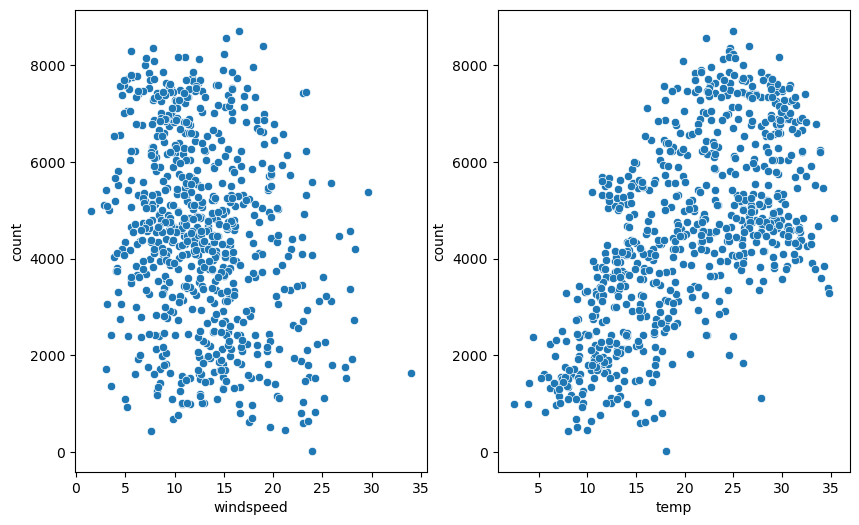

In [61]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.scatterplot(x='windspeed', y='count', data=biking_df_01)
plt.subplot(1,2,2)
sns.scatterplot(x='temp', y='count', data=biking_df_01)
plt.show()

- Observations
    - temp and windspeed have highest VIF and 2nd highest VIF
    - But temp variable is highest correlation with count variable, so we cannot remove temp variable

In [62]:
X_train_rfe_1.head(1)

,year,holiday,temp,windspeed,Jul,Sep,Light Snow,Mist,Spring,Summer,Winter
576,1,0,0.815169,0.264686,1,0,0,0,0,0,0


In [63]:
# Build a second linear model with the selected features
X_train_lm_two = sm.add_constant(X_train_rfe_1)
lr_two = sm.OLS(y_train, X_train_lm_two).fit()
lr_two.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          5.06e-187
Time:                        12:39:14   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1994      0.030      6.746      0.000       0.141       0.258
year           0.2336      0.008     28.352      0.000       0.217       0.250
holiday       -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp           0.4910      0.033     14.770      0.000       0.426       0.556
windspeed     -0.1479      0.025     -5.887      0.000      -0.197      -0.099
Jul           -0.0521      0.019     -2.790      0.005      -0.089      -0.015
Sep            0.0768      0.017      4.517      0.000       0.043       0.110
Light Snow    -0.2842      0.025    -11.487      0.000      -0.333      -0.236
Mist          -0.0802      0.009     -9.146      0.000      -0.097      -0.063
Spring        -0.0672      0.021     -3.175      0.002      -0.109      -0.026
Summer         0.0465      0.015      3.051      0.002       0.017       0.076
Winter         0.0817      0.017      4.730      0.000       0.048       0.116
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Observation
    - all p values < 0.05
    - Jul has highest p value 0.005 but less than 0.05

In [64]:
# Drop the feature 'Jul' as it has high p-value in the current model
X_train_rfe_2 = X_train_rfe_1.drop(["Jul"], axis = 1)


In [65]:
# Build a third linear regression model with the selected features
X_train_lm_three = sm.add_constant(X_train_rfe_2)
lr_three = sm.OLS(y_train, X_train_lm_three).fit()
lr_three.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          1.47e-186
Time:                        12:39:15   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1909      0.030      6.447      0.000       0.133       0.249
year           0.2341      0.008     28.237      0.000       0.218       0.250
holiday       -0.0963      0.026     -3.668      0.000      -0.148      -0.045
temp           0.4777      0.033     14.423      0.000       0.413       0.543
windspeed     -0.1481      0.025     -5.854      0.000      -0.198      -0.098
Sep            0.0910      0.016      5.566      0.000       0.059       0.123
Light Snow    -0.2850      0.025    -11.444      0.000      -0.334      -0.236
Mist          -0.0787      0.009     -8.938      0.000      -0.096      -0.061
Spring        -0.0554      0.021     -2.654      0.008      -0.096      -0.014
Summer         0.0621      0.014      4.350      0.000       0.034       0.090
Winter         0.0945      0.017      5.630      0.000       0.062       0.127
==============================================================================
Omnibus:                       63.413   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.384
Skew:                          -0.674   Prob(JB):                     1.21e-31
Kurtosis:                       5.210   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observation
- Almost all p values of the predictors are ZERO
- Prob (F-statistic):	1.47e-186  which is almost ZERO
- R2 is 0.833
- Adj. R2 is 0.829
- This model looks good fit

In [66]:
# Calculate VIF for the selected features on training set
calculateVIF(X_train_rfe_2)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
7,Spring,1.99
8,Summer,1.90
9,Winter,1.63
6,Mist,1.55
4,Sep,1.23
5,Light Snow,1.08
1,holiday,1.04


#### Observation
 - All VIF values are < 5 which is good for our model.

## Residual Analysis

In [67]:
X_train_lm_three.shape

(510, 11)

In [68]:
# Predicting the values of the target variable on training set
y_train_pred = lr_three.predict(X_train_lm_three)
y_train_pred.shape

#fitted = lr_three.fittedvalues
#fitted.shape

(510,)

In [69]:
# Calcualting the residuals on training set
residuals = y_train - y_train_pred
residuals.shape

(510,)

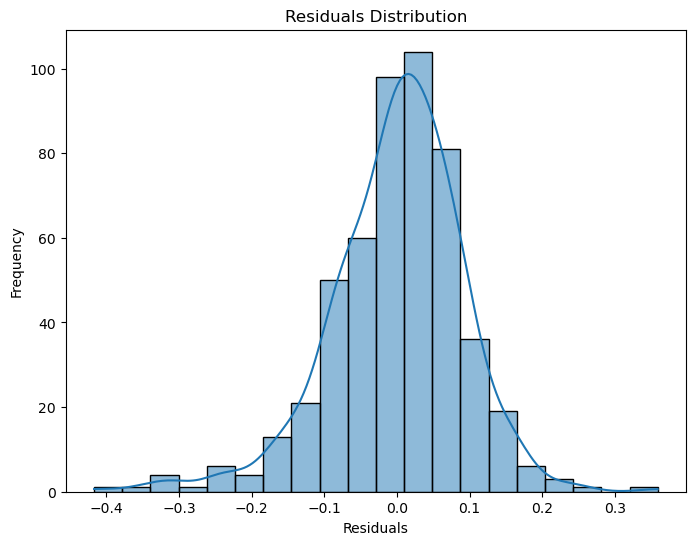

In [70]:
# Check the distribution of the residuals on training set
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=20,kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

#### Observation
- Residuals are having mean at 0
- Residuals are following normal distribution
- Residuals assumptions are matching and we are good on the model

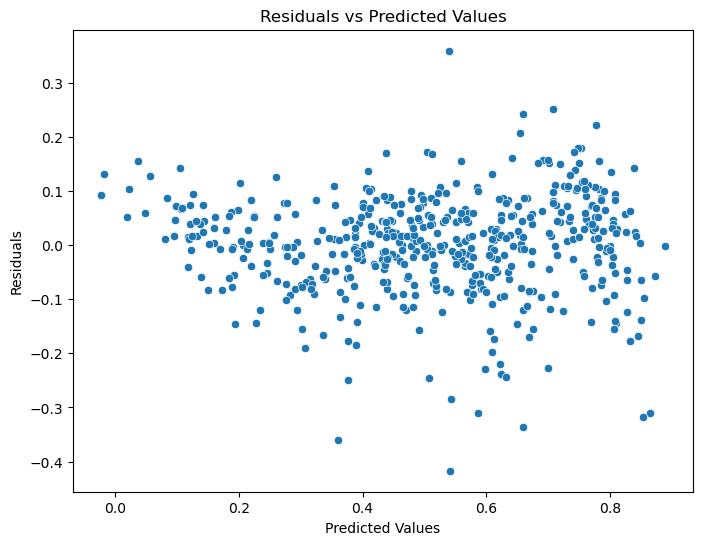

In [71]:
# Create a Scatter Plot of Residuals vs. Predictd values (Fitted Values) on training set
# Check for linearity and homoscedasticity
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train_pred, y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

#### Observation 
- The residuals are randomly scattered around zero without any clear patter.
- It implies linearity of the model

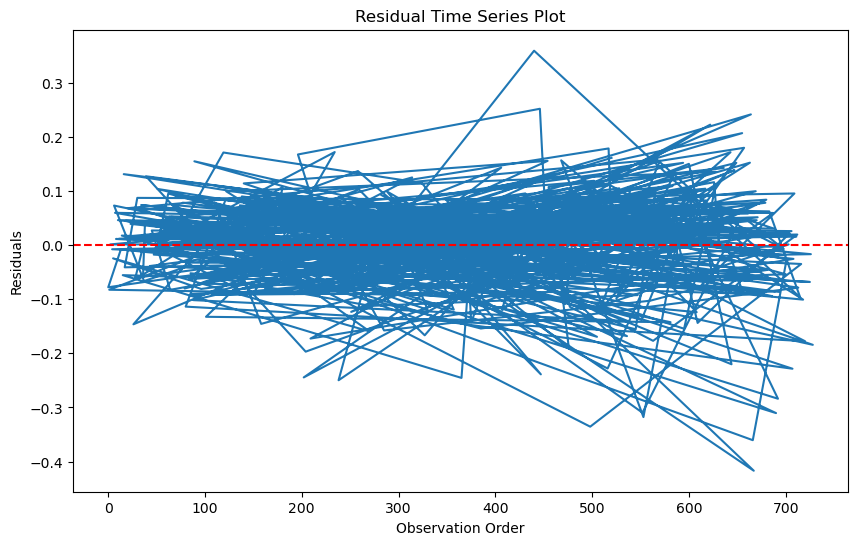

In [72]:
# Create a residual time series plot
# Check for independence of residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residual Time Series Plot')
plt.xlabel('Observation Order')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

#### Observation
- The residuals do not show any clear pattern over time. This implies that residuals are independent.

<Figure size 800x600 with 0 Axes>

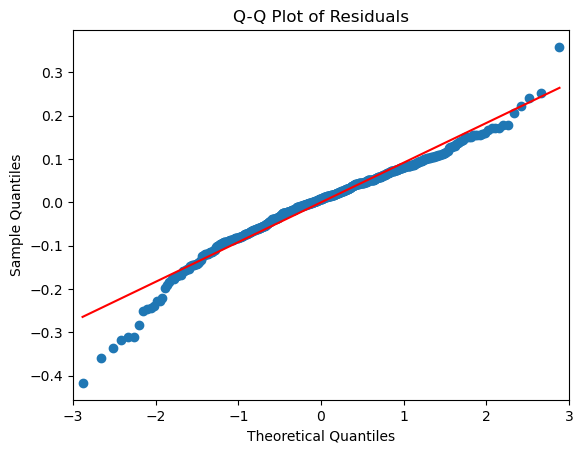

In [73]:
# Create a Q-Q plot of the residuals
# Checks for normality of the residuals
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

#### Observation
- The residuals are falling approximately along with reference line without any major deviations
- It implies the normality of the residuals

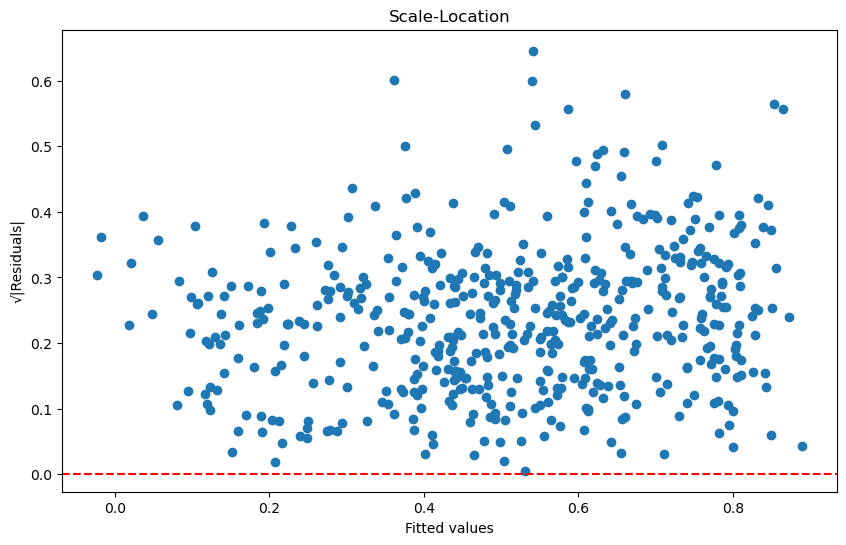

In [74]:
# Scale-Location Plot
# Check for homoscedasticity
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, np.sqrt(np.abs(residuals)))
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Scale-Location')
plt.xlabel('Fitted values')
plt.ylabel('√|Residuals|')
plt.show()

#### Observation
 - The residuals are speaded equally along the range of predictors. There is no funnel shape in the plot
 - It implies homoscedasticity of the residuals

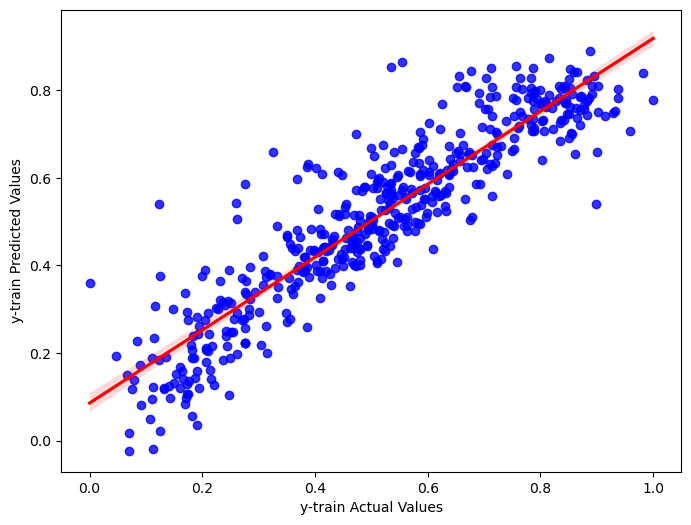

In [75]:
# Create a regression plot of the actuals against the predicted values
plt.figure(figsize=(8, 6))
sns.regplot(x=y_train, y=y_train_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel('y-train Actual Values')
plt.ylabel('y-train Predicted Values')
plt.show()


#### Observations

- #### 1. QQ Plot and Regression Plot are confirming that our model is fairly good for regression 
- #### 2. As we're good on above point 1, We are confirming the model "lr_three"

## Applying the model on the test set

In [76]:
# Test dataframe before scaling
df_test[num_vars].describe()

,temp,atemp,humidity,windspeed,count
count,220.000000,220.000000,220.000000,220.000000,220.000000
mean,20.808400,24.250312,61.934025,12.598352,4560.559091
std,7.672796,8.281075,14.429542,4.973534,1904.968544
min,3.957390,4.941955,25.416700,1.500244,441.000000
25%,14.119375,17.090025,51.354200,9.031466,3312.750000
50%,20.790424,24.700000,60.708350,12.188004,4582.500000
75%,27.299153,31.124313,72.179375,15.385361,5913.000000
max,34.815847,41.318550,97.250000,27.999836,8395.000000


In [77]:
# Transforming the scale on the num_vars on test data frame
df_test[num_vars]= scaler.transform(df_test[num_vars])
df_test[num_vars].describe()

,temp,atemp,humidity,windspeed,count
count,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.558172,0.544652,0.625590,0.300126,0.524678
75%,0.755981,0.713308,0.743798,0.402718,0.677750
max,0.984424,0.980934,1.002146,0.807474,0.963300


In [78]:
df_test.shape

(220, 30)

In [79]:
df_test.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'count', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed',
       'Light Snow', 'Mist', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [80]:
# Create X and y datasets from test data frame
y_test = df_test.pop('count')
X_test = df_test
print(f'Shape of X_test {X_test.shape} \nShape of y_test {y_test.shape}')



Shape of X_test (220, 29) 
Shape of y_test (220,)


In [81]:
X_test.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed',
       'Light Snow', 'Mist', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [82]:
X_train_rfe_2.columns

Index(['year', 'holiday', 'temp', 'windspeed', 'Sep', 'Light Snow', 'Mist',
       'Spring', 'Summer', 'Winter'],
      dtype='object')

In [83]:
# Replace X_test Columns with X_train_rfe_2 column for which we finalized the linear regression model
X_test = X_test [X_train_rfe_2.columns]
X_test.columns

Index(['year', 'holiday', 'temp', 'windspeed', 'Sep', 'Light Snow', 'Mist',
       'Spring', 'Summer', 'Winter'],
      dtype='object')

In [84]:
X_test.describe()

,year,holiday,temp,windspeed,Sep,Light Snow,Mist,Spring,Summer,Winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.558718,0.313293,0.086364,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.233187,0.159584,0.281541,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.046591,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.355429,0.198843,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.558172,0.300126,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.755981,0.402718,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,0.984424,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
# Adding constant variable to the test data frame
X_test_sm = sm.add_constant(X_test)
X_test_sm.head(1)

,const,year,holiday,temp,windspeed,Sep,Light Snow,Mist,Spring,Summer,Winter
184,1.0,0,1,0.831783,0.084219,0,0,1,0,0,0


In [86]:
# Predicting y variable based on X_test_sm
y_test_pred = lr_three.predict(X_test_sm)
y_test_pred

184    0.400699
535    0.894906
299    0.401679
221    0.561750
152    0.563769
         ...   
702    0.725548
127    0.521945
640    0.789203
72     0.263720
653    0.718507
Length: 220, dtype: float64

#### Calculating R Square value between actual and predicted of target variables from Test data frame

In [87]:
r2_value = r2_score(y_test,y_test_pred)
print('R Square value for test data frame',round(r2_value,3))

R Square value for test data frame 0.804


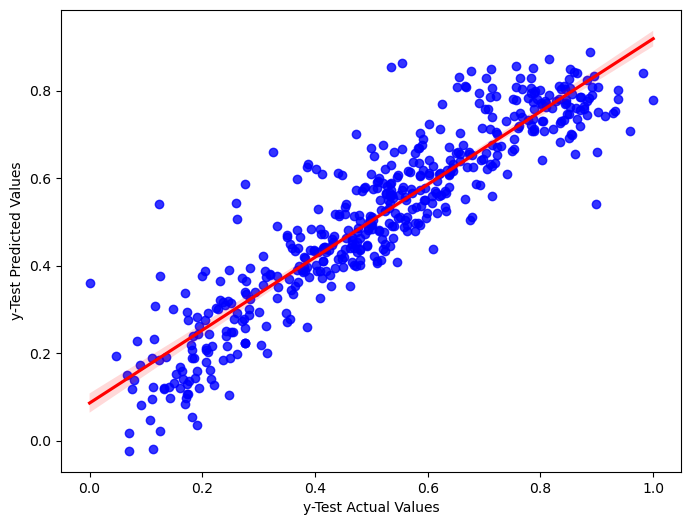

In [88]:
# Create a regression plot of the actuals against the predicted values
plt.figure(figsize=(8, 6))
sns.regplot(x=y_train, y=y_train_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"},fit_reg=True)
plt.xlabel('y-Test Actual Values')
plt.ylabel('y-Test Predicted Values')
plt.show()


In [89]:
print('Below are the final model params\n',round(lr_three.params,4))


Below are the final model params
 const         0.1909
year          0.2341
holiday      -0.0963
temp          0.4777
windspeed    -0.1481
Sep           0.0910
Light Snow   -0.2850
Mist         -0.0787
Spring       -0.0554
Summer        0.0621
Winter        0.0945
dtype: float64


In [90]:
parms = lr_three.params 
parms.sort_values(ascending=False)



temp          0.477737
year          0.234132
const         0.190855
Winter        0.094476
Sep           0.090998
Summer        0.062076
Spring       -0.055406
Mist         -0.078741
holiday      -0.096316
windspeed    -0.148098
Light Snow   -0.285031
dtype: float64

#### Our Regression Model equation can be explained as below :

#### Count = 0.1909 +0.2341* year -0.0963* holiday +0.4777* temp -0.1481*  windspeed +0.0910* Sep   - 0.2850* Light Snow  -0.0787* Mist -0.0554* Spring +0.0621* Summer + 0.0945* Winter

In [91]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2_value)*(X_test.shape[0]-1) / (X_test.shape[0]-X_test.shape[1]-1),3)
print(adjusted_r2)

0.794


- R Square for Train dataset      : 0.833
- R Square for Test dataset       : 0.804
- Adj- R Square for Train dataset : 0.829
- Adj- R Square for Test  dataset : 0.794



#### Demand of bikes is dependent on the following variables

- year, temp, sep, summer and winter. (With Positve Coefficients)
- holiday, windspeed, Light_snowrain, Misty, spring. (With Negative Coefficients) 